## Stats507 Homework 6, February 27, 2019
### Israel Diego
#### israeldi@umich.edu
#### Discussed with Hunter Zhang

This notebook shows solutions to homework 6 for Stats507

## Table of Contents <a name = "toc"></a>

1. [Problem 1: Warmup: constructing pandas objects](#prob1)
2. [Problem 2: Working with pandas DataFrames](#prob2)
3. [Problem 3: Plotting Dataframes: Major League Baseball](#prob3)

### Problem 1: Warmup: constructing pandas objects <a name = "prob1"></a> ([Back to Top](#toc))
#### Time Spent: 1 hour
In this problem, you will create two simple pandas objects.
1. Create a `pandas` Series object with indices given by the first $10$ letters of the English alphabet and values given by the first $10$ primes.

In [23]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Use our Primes Generator from Homework 4
def primes():
    (primesList, num) = ([], 2)
    while(True):
        while(any(num % x == 0 for x in primesList)):
            num += 1
        primesList.append(num)
        yield num

# Generate Primes and Alphabetical letters
n = 10
p = primes()
primeNums = [next(p) for _ in range(n)]
letters = list(map(chr, range(97, 97 + n)))

# Produce Dataframe
pdSeries = pd.Series(primeNums, index = letters)
# pdSeries

2. Below is a table that might arise in a genetics experiment. Reconstruct this as a `pandas` DataFrame.
<img src="https://raw.githubusercontent.com/israeldi/israeldi.github.io/master/Stats507/Homeworks/israeldi_hw6/table.png" alt="Drawing" style="width: 250px;"/>

In [24]:
pattern1 = ['A', 'A', 'a', 'a']
pattern2 = ['A', 'a', 'A', 'a']

# Initialize Columns
tuples = list(zip(*[sum(list(map(lambda x: [x] * 4, ['goat', 'bird', 'llama'])), []),
                    pattern1 * 3,
                    pattern2 * 3]
                 ))

index = pd.MultiIndex.from_tuples(tuples, names = ['animal', 'parent1', 'parent2'])

data = {'score1': list(range(1, 13)), 
        'score2': sum([[2], sum([[2*x] * 2 for x in range(2, 7)], []), [14]], [])
       }

pandasDF = pd.DataFrame(data, index = index)
# df

### Problem 2: Working with pandas DataFrames <a name = "prob2"></a> ([Back to Top](#toc))
#### Time Spent: 1 hour
In this problem, you'll get practice working with pandas DataFrames, reading them into and out of memory, changing their contents and performing aggregation operations. For this problem, you'll need to download the celebrated iris data set, available as a .csv file from my website: http://www-personal.umich.edu/~klevin/teaching/Winter2018/STATS701/iris.csv **Note:** for the sake of consistency, please use this version of the CSV, and not one from elsewhere.
1. Download the iris data set from the link above. Please include this file in your submission. Read `iris.csv` into Python as a `pandas` DataFrame. Note that the CSV file includes column headers. How many data points are there in this data set? What are the data types of the columns? What are the column names? The column names correspond to flower species names, as well as four basic measurements one can make of a flower: the width and length of its petals and the width and length of its sepal (the part of the pant that supports and protects the flower itself). How many species of flower are included in the data?

In [25]:
iris = pd.read_csv('iris.csv')

# Number of Data Points
print('Number of data points: %d'% (len(iris)))

# Data types of the columns
print(iris.dtypes)

# Column names
print(list(iris))

# Number of Species
print('Number of Species: %d'% (len(iris['Species'].unique())))

Number of data points: 150
Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object
['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']
Number of Species: 3


2. The data that I uploaded to my website, which you have downloaded, is based on the data initially uploaded to the UC Irvine machine learning repository. It is now known that this data contains errors in two of its rows (see the documentation at https://archive.ics.uci.edu/ml/datasets/Iris). Using $1$-indexing, these errors are in the $35$th and $38$th rows. The $35$th row should read $4.9,3.1,1.5,0.2,$"Iris-setosa", where the fourth feature is incorrect as it appears in the file, and the 38th row should read $4.9,3.6,1.4,0.1,$"Iris-setosa", where the second and third features are incorrect as they appear in the file. Correct these entries of your DataFrame.

In [26]:
iris.at[34,'Petal.Width'] = 0.2
iris.at[37,'Sepal.Width'] = 3.6
iris.at[37,'Petal.Length'] = 1.4

3. The iris dataset is commonly used in machine learning as a proving ground for clustering and classification algorithms. Some researchers have found it useful to use two additional features, called *Petal ratio* and *Sepal ratio*, defined as the ratio of the petal length to petal width and the ratio of the sepal length to sepal width, respectively. Add two columns to you DataFrame corresponding to these two new features. Name these columns `Petal.Ratio` and `Sepal.Ratio`, respectively.

In [27]:
iris['Petal.Ratio'] = iris.apply(lambda x: x['Petal.Length'] / x['Petal.Width'], axis = 1)
iris['Sepal.Ratio'] = iris.apply(lambda x: x['Sepal.Length'] / x['Sepal.Width'], axis = 1)

4. Save your corrected and extended iris DataFrame to a csv file called `iris_corrected.csv`. Please include this file in your submission.

In [28]:
iris.to_csv("iris_corrected.csv", index = False)

5. Use a `pandas` aggregate operation to determine the mean, median, minimum, maximum and standard deviation of the petal and sepal ratio for each of the three species in the data set. **Note:** you should be able to get all of these numbers in a single table (indeed, in a single line of code) using a well-chosen group-by or aggregate operation.

In [29]:
iris.groupby('Species')[['Petal.Ratio', 'Sepal.Ratio']].agg(['mean', 'median', 'min', 'max', 'std'])

Petal.Ratio                                     Sepal.Ratio  \
                  mean    median       min   max       std        mean   
Species                                                                  
setosa        6.908000  7.000000  2.666667  15.0  2.854545    1.470188   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median       min       max       std  
Species                                             
setosa      1.463063  1.268293  1.956522  0.118750  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

### Problem 3: Plotting Dataframes: Major League Baseball <a name = "prob3"></a> ([Back to Top](#toc))
#### Time Spent: 2 hours
In this problem, you'll get more practice working with `pandas` data frames and perform some basic plotting. We'll work with a data set consisting of all the baseball games from the 2018 Major League Baseball (MLB) regular season, compiled by `retrosheet.org`. Don't worry- you don't need to know anything about baseball to complete this assignment! You can download the relevant CSV file either from the course web page at http://www-personal.umich.edu/~klevin/teaching/Winter2019/STATS507/mlb2018.zip or directly from the original source at https://www.retrosheet.org/gamelogs/gl2018.zip. **Note:** even though the zipped file is named as a `.txt` file, it is in fact a CSV file, which `pandas` will still be able to read. 

**Requisite legal boilerplate:** The information used here was obtained free of charge from and is copyrighted by Retrosheet. Interested parties may contact Retrosheet at " www.retrosheet.org ".
1. Read the data into a table called `mlb_df`. Each row of the table represents the outcome of a single game from the $2018$ MLB season. Take note that the file does not have columns names; see the `header` keyword to the `pandas.read_csv` function. The columns are explained in a .txt file which you can download from https://www.retrosheet.org/gamelogs/glfields.txt, but we will only make use of a few of them in this problem. The $10$-th and $11$-th columns (using $1$-indexing) are the scores of the visiting and home teams, respectively. Rename these columns `v_score` and `h_score`, respectively. MLB comprises two leagues, the American League and the National League, encoded as `AL` and `NL` in the table. The $5$-th and $8$-th columns (also $1$-indexed) are the league affiliations of the visiting and home team, respectively. Rename these columns `v_league` and `h_league`.

In [30]:
mlb_df = pd.read_csv('GL2018.TXT', header = None)
mlb_df.rename({9: 'v_score', 
               10: 'h_score', 
               4: 'v_league',
               7: 'h_league'},
               axis = 1, inplace = True)
# mlb_df.head()

2. Create a plot with two subplots, placed side-by-side. Each subplot should be a scatter plot in which the x- and y-axes correspond to the home and visitor scores, respectively, and in which each point corresponds to a game from the season. In the left-hand plot, include all games in which both teams were in the NL, and in the right-hand plot, include all games in which both teams were in the AL. Games in which the teams were from different leagues should be ignored. Specify the transparency (cf. the `alpha` parameter in the `matplotlib` documentation) so that scores that occur more often will be shaded darker than rare scores. Color the points in the scatter plot according to the league affiliation of the two teams as follows: games between two teams both in the AL should be rendered as red points in the scatter plot. Games between two teams both in the NL should be rendered as blue points in the scatter plot. Label your axes and provide an appropriate title for your plot as well as its subplots. **Note:** you may find it useful to create an extra column in the data frame encoding whether a given game is AL vs AL, NL vs NL or mixed.

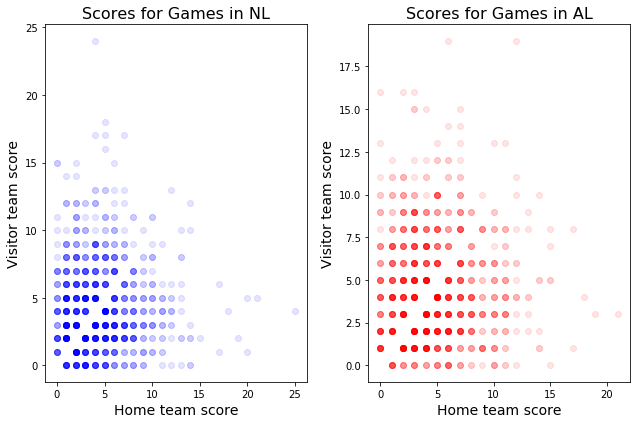

In [31]:
league_df = mlb_df[['v_league', 'h_league', 'v_score', 'h_score']][mlb_df.v_league == mlb_df.h_league]

colors = ['Blue', 'Red']
league = ['NL', 'AL']

for i in range(2):
    plt.rcParams['figure.figsize'] = [9, 6]
    plt.subplot(plt.subplot(int(str(1) + '2' + str(i + 1))))
    plt.scatter(league_df["h_score"][league_df["v_league"] == league[i]],
                league_df["v_score"][league_df["v_league"] == league[i]],
                c = colors[i], alpha = 0.1)
    plt.title("Scores for Games in " + league[i], fontsize = 16)
    plt.xlabel("Home team score", fontsize = 14)
    plt.ylabel("Visitor team score", fontsize = 14)
plt.tight_layout()

3. The Skellam distribution (https://en.wikipedia.org/wiki/Skellam_distribution) is the distribution that results from taking the difference between two Poisson random variables. It is often suggested as a model for the difference between scores in sports games, particularly baseball. Add a new column to the data frame called `score_diff`, given by the home score minus the away score. Make a histogram of this score difference and give the plot an appropriate title.

Text(0.5,1,'Difference of Scores in Baseball Games between Home and Visit')

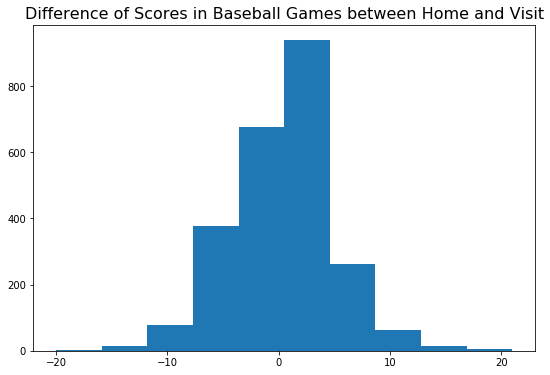

In [32]:
# Add new Column for score differences
mlb_df['score_diff'] = mlb_df['h_score'] - mlb_df['v_score']

# Create Histogram
_ = plt.hist(mlb_df['score_diff'])
plt.title('Difference of Scores in Baseball Games between Home and Visit', fontsize = 16)

4. Read the documentation about the scipy implementation of the Skellam distribution at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skellam.html. If $\lambda_H$ and $\lambda_V$ are the means of two independent Poisson random variables $K_H$ and $K_V$, respectively, then the Skellam distribution that describes the difference $K_H-K_V$ has parameters $\lambda_H$ and $\lambda_V$. We will assume (perhaps incorrectly) that the location parameter of the Skellam distribution is $0$. To fit a Skellam distribution to the data, we will first fit Poisson distributions to the home and away teams. 

Estimate parameters $\hat{\lambda}_{H}$ and $\hat{\lambda}_{V}$ as the means of the home and visitor scores, respectively. Use `scipy` to run a Kolmogorov-Smirnov test assessing whether or not the Skellam distribution with parameters $(\mu_1, \mu_2)=(\hat{\lambda}_{H},\hat{\lambda}_{V})$ and location parameter $0$ is a good fit for the score differences. **Hint:** see the documentation at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html to see how to perform such a test. Is the Skellam distribution a reasonable model to use? What might we do to build a more accurate model?

In [33]:
v_mean = mlb_df.v_score.mean()
h_mean = mlb_df.h_score.mean()
(KS_Stat, p_value) = scipy.stats.kstest(mlb_df["score_diff"], cdf = "skellam", args = (h_mean, v_mean))
KS_Stat, p_value

(0.2052406383420739, 0.0)

- Given our $p$-value from the Kolmogorov-Smirnov is practically 0, we reject the null hypothesis that the two distributions are identical. So we conclude that the skellam distribution would not be a good fit to the score differences. 


- We may still use the Skellam model and try to improve on the accuracy. First, we can estimate the correlation coefficient of the two Poisson distributions in order to improve our estimates of $\mu_1$ and $\mu_2$. Next, we note that the Kolmogorov-Smirnov test is intended for continuous distributions, so we can fit a density function to the histogram we created in question $3$. In this case, we make appropriate use of the Kolmogorov-Smirnov test and improve our accuracy.